In [1]:
# === 1️⃣ Import Library ===
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib
import matplotlib.pyplot as plt

# === 2️⃣ Load Dataset hasil clustering ===
df = pd.read_csv("clustered_learners.csv")

print("✅ Data loaded:", df.shape)
print("Kolom:", df.columns.tolist())
print(df[['developer_id', 'learner_type']].head())


✅ Data loaded: (31, 11)
Kolom: ['developer_id', 'materials_completed', 'active_days', 'avg_rating', 'avg_score', 'consistency_score', 'fast_learner_flag', 'reflective_learner_flag', 'study_duration_total', 'cluster', 'learner_type']
   developer_id        learner_type
0          3390  Consistent Learner
1          5774  Consistent Learner
2         11836  Consistent Learner
3         17833  Consistent Learner
4         32258        Fast Learner


In [2]:
# === 2️⃣ Pisahkan fitur dan target ===
X = df[['materials_completed', 'active_days', 'avg_rating',
        'avg_score', 'consistency_score', 'study_duration_total']]

y = df['learner_type']

# Encode target (karena learner_type berupa teks)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# === 3️⃣ Split data jadi train-test ===
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("✅ Data siap untuk training!")
print("X_train shape:", X_train.shape)
print("Distribusi kelas di training set:")
print(pd.Series(y_train).value_counts())


✅ Data siap untuk training!
X_train shape: (24, 6)
Distribusi kelas di training set:
0    13
1     7
2     4
Name: count, dtype: int64


✅ Model berhasil dilatih!

📊 Classification Report:
                    precision    recall  f1-score   support

Consistent Learner       1.00      0.50      0.67         4
      Fast Learner       0.50      1.00      0.67         2
Reflective Learner       1.00      1.00      1.00         1

          accuracy                           0.71         7
         macro avg       0.83      0.83      0.78         7
      weighted avg       0.86      0.71      0.71         7



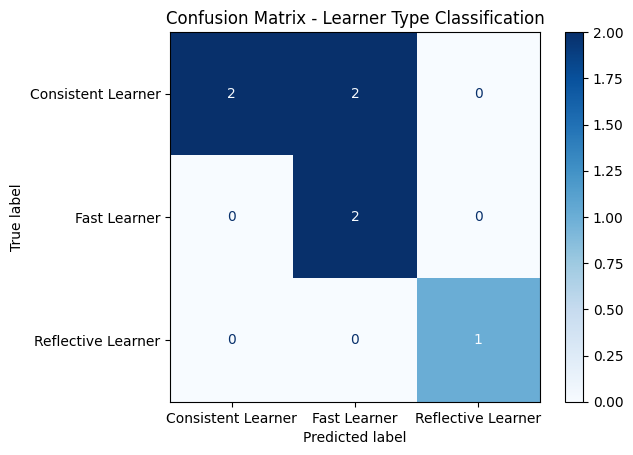

In [3]:
# === 3️⃣ Training Model Random Forest ===
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Buat dan latih model
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf_model.fit(X_train, y_train)

# Prediksi di data test
y_pred = rf_model.predict(X_test)

# === 4️⃣ Evaluasi Model ===
print("✅ Model berhasil dilatih!\n")
print("📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

# Visualisasi confusion matrix
ConfusionMatrixDisplay.from_estimator(
    rf_model, X_test, y_test, display_labels=encoder.classes_, cmap='Blues'
)
plt.title("Confusion Matrix - Learner Type Classification")
plt.show()



In [5]:
# === 5️⃣ Simpan model dan encoder ===
import joblib

joblib.dump(rf_model, "model_learning_insight.pkl")
joblib.dump(encoder, "label_encoder.joblib")

print("✅ Model & encoder berhasil disimpan!")


✅ Model & encoder berhasil disimpan!
